In [3]:
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as img
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
from pathlib import Path
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import load_model
from PIL import Image
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import *

# Pre-processing

In [4]:
data_path=pathlib.Path('./data')

In [5]:
image_classes=os.listdir(data_path)
image_classes

['benign', 'malignant']

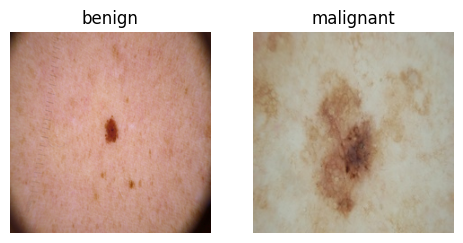

In [6]:
def plot_images (image_classes):
    
    plt.figure(figsize=(12,12))
    
    for i, category in enumerate (image_classes):
        
        image_path= data_path / category
        image_in_folder=os.listdir(image_path)
        
        first_image=image_in_folder[0]
        first_image_path=image_path / first_image
        
        img=image.load_img(first_image_path)
        img_array=image.img_to_array(img) / 255
        
        plt.subplot(4,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
        
plt.show() 

plot_images (image_classes)

In [7]:
data_generator=ImageDataGenerator(rescale=1/255,
                                 validation_split=0.2)

In [8]:
train_file=data_generator.flow_from_directory(data_path,
                                            target_size=(224,224),
                                             batch_size=32,
                                              class_mode='categorical',
                                               shuffle=True,
                                                subset='training') 

Found 216 images belonging to 2 classes.


In [9]:
test_file=data_generator.flow_from_directory(data_path,
                                            target_size=(224,224),
                                             batch_size=1,
                                              class_mode='categorical',
                                               shuffle=True,
                                                subset='validation') 

Found 54 images belonging to 2 classes.


In [10]:
print(test_file.image_shape)
print(train_file.image_shape)

(224, 224, 3)
(224, 224, 3)


# Model Creation

In [11]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',
                 activation='relu',input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,padding='same',kernel_size=3,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2, activation = 'softmax'))          

C:\Users\Nando\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,709,890 (98.08 MB)

 Trainable params: 25,709,890 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [13]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model_history=model.fit(train_file,epochs=10,validation_data=test_file)

Epoch 1/10


C:\Users\Nando\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.8317 - loss: 5.3291 - val_accuracy: 0.9444 - val_loss: 0.2204
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.8716 - loss: 0.3613 - val_accuracy: 0.8889 - val_loss: 0.3376
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.9068 - loss: 0.3425 - val_accuracy: 0.8889 - val_loss: 0.2671
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.8898 - loss: 0.3155 - val_accuracy: 0.8889 - val_loss: 0.2276
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.8848 - loss: 0.2687 - val_accuracy: 0.9630 - val_loss: 0.2142
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.9140 - loss: 0.2393 - val_accuracy: 0.9630 - val_loss: 0.2044
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.9111 - loss: 0.2601 - val_accuracy: 0.8889 - val_loss: 0.2780
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.9023 - loss: 0.2480 - val_accuracy: 0.8889 - val_loss: 0.2780
Epo

# Data Visualization

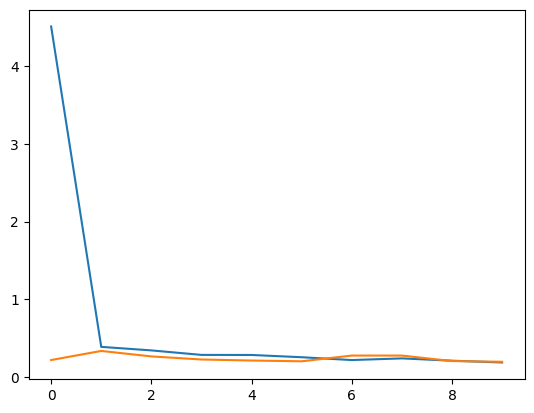

In [15]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')

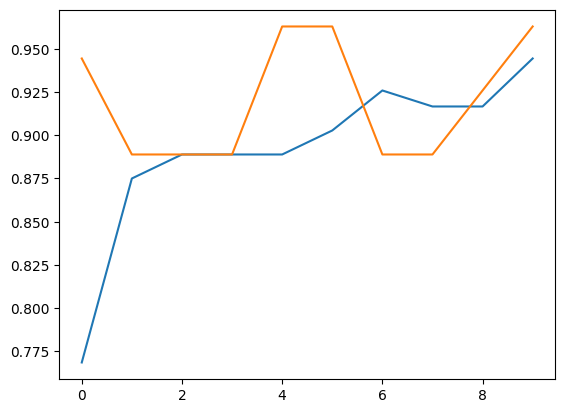

In [16]:
plt.plot(model_history.history['accuracy'],label='train_accuracy')
plt.plot(model_history.history['val_accuracy'],label='validation_accuracy')

# Model Evaluation

In [17]:
model.evaluate(test_file)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9600 - loss: 0.1958


[0.19798262417316437, 0.9629629850387573]

In [18]:
model.evaluate(train_file)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9736 - loss: 0.1953


[0.19410336017608643, 0.9629629850387573]

In [19]:
model.save('CNN.h5')

In [20]:
def load_and_preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize image to 224x224
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 224, 224, 3)
    return img

# Make a prediction
model = load_model('CNN.h5')
img = load_and_preprocess_image('./data/malignant/105.jpg')
predictions = model.predict(img)
predicted_class = np.argmax(predictions)


class_labels = ['malignant','benign']

# Print the predicted class
print(f"Predicted class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: benign
